In [ ]:
from __future__ import print_function

import pandas as pd
import numpy as np

df = pd.read_csv('2018.csv') # read in the csv file
#df.info()

In [2]:
#Reduce dataset to a more manageable size.
dfReduced=df.sample(n=150000, random_state=1)

dfReduced.info()
dfReduced.describe().apply(lambda s: s.apply('{0:.5f}'.format))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 695058 to 499540
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              150000 non-null  object 
 1   OP_CARRIER           150000 non-null  object 
 2   OP_CARRIER_FL_NUM    150000 non-null  int64  
 3   ORIGIN               150000 non-null  object 
 4   DEST                 150000 non-null  object 
 5   CRS_DEP_TIME         150000 non-null  int64  
 6   DEP_TIME             147634 non-null  float64
 7   DEP_DELAY            147518 non-null  float64
 8   TAXI_OUT             147561 non-null  float64
 9   WHEELS_OFF           147561 non-null  float64
 10  WHEELS_ON            147492 non-null  float64
 11  TAXI_IN              147492 non-null  float64
 12  CRS_ARR_TIME         150000 non-null  int64  
 13  ARR_TIME             147492 non-null  float64
 14  ARR_DELAY            147112 non-null  float64
 15  CANCELLED   

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,150000.00000,150000.00000,147634.00000,147518.00000,147561.00000,147561.00000,147492.00000,147492.00000,150000.00000,147492.00000,...,150000.00000,147165.00000,147165.00000,150000.00000,28035.00000,28035.00000,28035.00000,28035.00000,28035.00000,0.00000
mean,2610.45619,1328.22438,1332.47427,9.90160,17.40465,1356.01141,1461.80967,7.62469,1484.53053,1466.05086,...,141.13015,136.46714,111.45453,799.62115,19.25297,3.53080,15.95798,0.08935,25.82215,nan
std,1864.14742,491.01257,504.34464,45.12021,9.95844,505.93189,532.98471,6.11827,518.40491,537.39677,...,73.50667,73.21552,71.16854,598.75699,60.43911,27.28905,36.98216,3.13707,51.35604,nan
min,1.00000,1.00000,1.00000,-43.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,21.00000,18.00000,8.00000,31.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan
25%,1026.00000,913.00000,915.00000,-5.00000,11.00000,930.00000,1044.00000,4.00000,1059.00000,1048.00000,...,88.00000,83.00000,60.00000,361.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan
50%,2131.00000,1320.00000,1326.00000,-2.00000,15.00000,1339.00000,1502.00000,6.00000,1515.00000,1505.00000,...,122.00000,118.00000,92.00000,632.00000,0.00000,0.00000,3.00000,0.00000,3.00000,nan
75%,4079.00000,1735.00000,1742.00000,7.00000,20.00000,1757.00000,1910.00000,9.00000,1917.00000,1915.00000,...,171.00000,167.00000,141.00000,1031.00000,17.00000,0.00000,20.00000,0.00000,31.00000,nan
max,7439.00000,2359.00000,2400.00000,1603.00000,171.00000,2400.00000,2400.00000,170.00000,2400.00000,2400.00000,...,695.00000,690.00000,665.00000,4983.00000,1594.00000,976.00000,1205.00000,398.00000,1379.00000,nan


In [3]:
#Remove attributes that just arent useful for us
del dfReduced['DIVERTED']
del dfReduced['DISTANCE']
del dfReduced['TAXI_OUT']
del dfReduced['TAXI_IN']
del dfReduced['Unnamed: 27']
del dfReduced['CANCELLED']
del dfReduced['CANCELLATION_CODE']
del dfReduced['DEST']
del dfReduced['OP_CARRIER_FL_NUM']



# df.info()
delayArr = [
    'DEP_DELAY'
    ,'ARR_DELAY'
    ,'CARRIER_DELAY'
    ,'WEATHER_DELAY'
    ,'NAS_DELAY'
    ,'SECURITY_DELAY'
    ,'LATE_AIRCRAFT_DELAY'
]
dfReduced[delayArr].describe().apply(lambda s: s.apply('{0:.5f}'.format)) # will get summary of continuous or the nominals non-scientific

,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,147518.00000,147112.00000,28035.00000,28035.00000,28035.00000,28035.00000,28035.00000
mean,9.90160,4.97184,19.25297,3.53080,15.95798,0.08935,25.82215
std,45.12021,47.21904,60.43911,27.28905,36.98216,3.13707,51.35604
min,-43.00000,-77.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-5.00000,-14.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,-2.00000,-6.00000,0.00000,0.00000,3.00000,0.00000,3.00000
75%,7.00000,8.00000,17.00000,0.00000,20.00000,0.00000,31.00000
max,1603.00000,1594.00000,1594.00000,976.00000,1205.00000,398.00000,1379.00000


In [4]:
dfReduced['MONTH'] = dfReduced['FL_DATE'].str[5:7]
conditions = [
    (dfReduced['CRS_ARR_TIME'] >= dfReduced['ARR_TIME']),
    (dfReduced['CRS_ARR_TIME'] < dfReduced['ARR_TIME'])]
choices = [1, 0]

dfReduced['ON_TIME_ARRIVAL'] = np.select(conditions, choices, default='null')

In [5]:
# We are only interested in flights that actually arrived.
# NAs are very few for these columns.  We will drop them.
dfReduced = dfReduced.dropna(subset=['ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME'])

# Set NaN values to 0.0 to show zero minutes for delay time. Used array and for loop to avoid repetetive code

def replaceNaN(data, arr):
    for delayType in arr:
        data[delayType] = data[delayType].fillna(0.0)
    return data

dfReduced = replaceNaN(dfReduced, delayArr)


In [6]:
#Now that we have month, lets get rid of FL_DATE as the information is captured
del dfReduced['FL_DATE']
#Lets reduce to top 10 airports by passengers for 2018
#https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States#Busiest_U.S._airports_by_total_passenger_traffic_(2018)
dfReduced=dfReduced[dfReduced.ORIGIN.eq("ATL")| dfReduced.ORIGIN.eq("LAX")| dfReduced.ORIGIN.eq("ORD")| dfReduced.ORIGIN.eq("DFW")| dfReduced.ORIGIN.eq("DEN")| dfReduced.ORIGIN.eq("JFK")| dfReduced.ORIGIN.eq("SFO")| dfReduced.ORIGIN.eq("SEA")| dfReduced.ORIGIN.eq("LAS")| dfReduced.ORIGIN.eq("MCO")]
#print(dfReduced)
dfReduced[['OP_CARRIER','ORIGIN','MONTH','ON_TIME_ARRIVAL']].describe().transpose()



,count,unique,top,freq
OP_CARRIER,45284,18,DL,8443
ORIGIN,45284,10,ATL,8049
MONTH,45284,12,07,4123
ON_TIME_ARRIVAL,45284,2,1,29072


In [7]:
# perform one-hot encoding of the categorical data "OP_CARRIER"
tmp_df = pd.get_dummies(dfReduced.OP_CARRIER,prefix="Operating Carrier")
dfReduced = pd.concat((dfReduced,tmp_df),axis=1)

# perform one-hot encoding of the categorical data "ORIGIN"
tmp_df = pd.get_dummies(dfReduced.ORIGIN,prefix="Origin")
dfReduced = pd.concat((dfReduced,tmp_df),axis=1)

# perform one-hot encoding of the categorical data "Month"
tmp_df = pd.get_dummies(dfReduced.MONTH,prefix="Month")
dfReduced = pd.concat((dfReduced,tmp_df),axis=1)


#Kill variables we hot-encoded
del dfReduced['OP_CARRIER']
del dfReduced['ORIGIN']
del dfReduced['MONTH']


dfReduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45284 entries, 929508 to 6830663
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CRS_DEP_TIME          45284 non-null  int64  
 1   DEP_TIME              45284 non-null  float64
 2   DEP_DELAY             45284 non-null  float64
 3   WHEELS_OFF            45284 non-null  float64
 4   WHEELS_ON             45284 non-null  float64
 5   CRS_ARR_TIME          45284 non-null  int64  
 6   ARR_TIME              45284 non-null  float64
 7   ARR_DELAY             45284 non-null  float64
 8   CRS_ELAPSED_TIME      45284 non-null  float64
 9   ACTUAL_ELAPSED_TIME   45284 non-null  float64
 10  AIR_TIME              45284 non-null  float64
 11  CARRIER_DELAY         45284 non-null  float64
 12  WEATHER_DELAY         45284 non-null  float64
 13  NAS_DELAY             45284 non-null  float64
 14  SECURITY_DELAY        45284 non-null  float64
 15  LATE_AIRCRAF

<AxesSubplot:xlabel='ON_TIME_ARRIVAL', ylabel='count'>

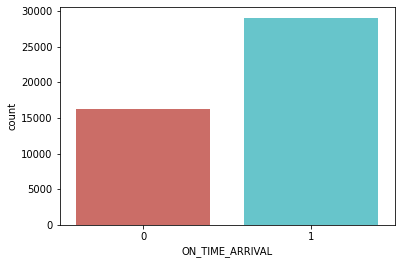

In [8]:
import seaborn as sns
dfReduced['ON_TIME_ARRIVAL'].value_counts()

sns.countplot(x='ON_TIME_ARRIVAL',data=dfReduced,palette='hls')


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
mms = MinMaxScaler()
dfScaled=dfReduced
dfScaled[["CRS_DEP_TIME", "DEP_DELAY","WHEELS_OFF","WHEELS_ON","CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
          "CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME","AIR_TIME","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY",
          "SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]] = mms.fit_transform(dfScaled[["CRS_DEP_TIME", "DEP_DELAY","WHEELS_OFF","WHEELS_ON","CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
          "CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME","AIR_TIME","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY",
          "SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]])
print(dfScaled)


         CRS_DEP_TIME  DEP_TIME  DEP_DELAY  WHEELS_OFF  WHEELS_ON  \
929508       0.701442    1925.0   0.149042    0.810338   0.922885   
2390254      0.611111    1441.0   0.023314    0.606920   0.643602   
1797438      0.347328     944.0   0.094088    0.419758   0.729887   
4821960      0.360051     850.0   0.024147    0.375990   0.416424   
4330544      0.735793    1818.0   0.059117    0.765736   0.797832   
...               ...       ...        ...         ...        ...   
2987493      0.765055    1804.0   0.023314    0.761150   0.844519   
4443275      0.784139    1851.0   0.024979    0.794081   0.807003   
5364170      0.215013     502.0   0.019151    0.214256   0.309296   
5364381      0.871925    2109.0   0.034138    0.885786   0.020425   
6830663      0.890161    2052.0   0.017485    0.876198   0.185911   

         CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CRS_ELAPSED_TIME  \
929508       0.802418  0.927887   0.206897          0.178248   
2390254      0.647770  0.646103   0.058540 

In [10]:
from sklearn.model_selection import train_test_split

X = dfScaled.drop('ON_TIME_ARRIVAL', axis=1)
y = dfScaled['ON_TIME_ARRIVAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 35.7
% Positive class in Test  = 36.2


In [11]:
from imblearn.over_sampling import SMOTE 


sm = SMOTE(random_state=25)

X_sm, y_sm = sm.fit_resample(X, y)


print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: ON_TIME_ARRIVAL, dtype: float64

In [16]:
print(y_sm)

0        0
1        1
2        0
3        1
4        0
        ..
58139    0
58140    0
58141    0
58142    0
58143    0
Name: ON_TIME_ARRIVAL, Length: 58144, dtype: object


In [33]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

y = y_sm.values # get the labels we want
X = X_sm.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,random_state=3,test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=3, test_size=0.2, train_size=None)


In [34]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.9155559377418523
confusion matrix
 [[4858  954]
 [  28 5789]]
====Iteration 1  ====
accuracy 0.9226072749161579
confusion matrix
 [[4912  883]
 [  17 5817]]
====Iteration 2  ====
accuracy 0.9206294608306819
confusion matrix
 [[4979  910]
 [  13 5727]]
